# 这是一个说明

## 数据集
这个数据集包含了两个标注，Annotations里包含了voc格式的标注，只有bbox和class。
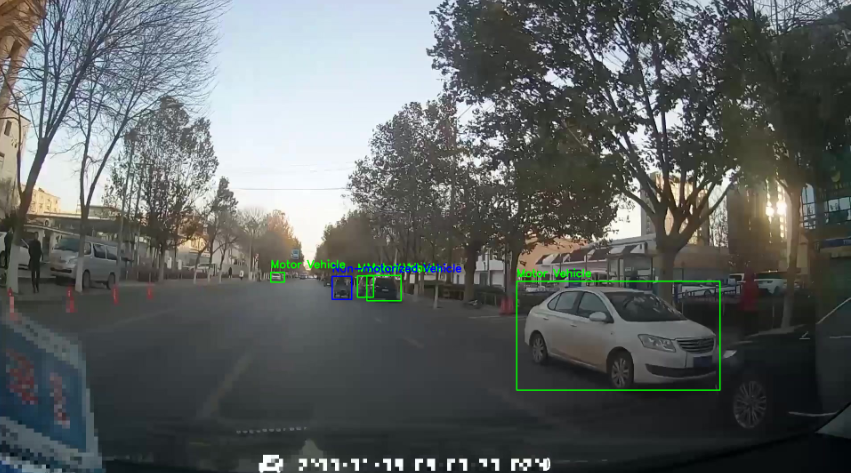

label里包含的是不知道什么格式，其中有bbox和点集，点集大概就是一个连通域，围成了一个mask。
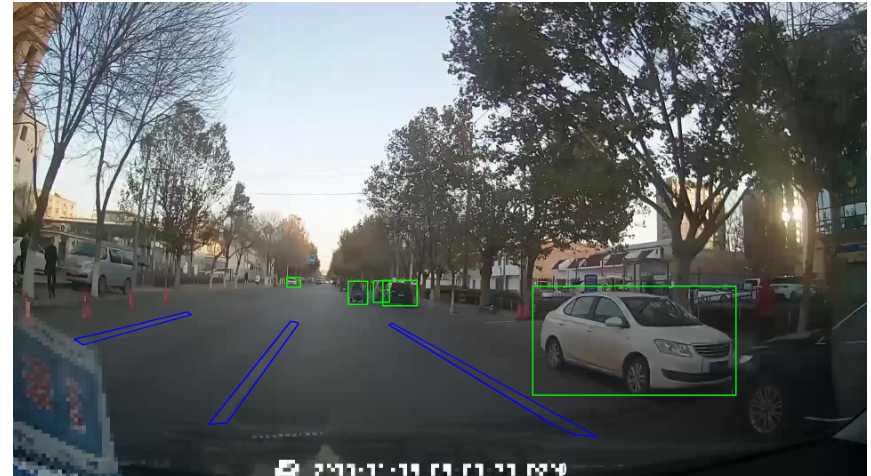

## 数据处理
删掉Annotations文件夹下带有_的xml，这个有_的xml是带有_的图片的标注，但是这些图只是不带_的镜像
```
python del_Annotatations.py
```
同理，删除带有_的图片
```
python del_imgs.py
```
然后再把所有的segment部分画一个新的图
```
python gen_seg.py
```
因为有数据不平衡的问题，所以ljk写了一个数据复制的脚本，根据图像里的类去复制不同的数量
```
python copy_dataset.py
```
以上就是数据本地的数据预处理部分

## yolo-pytorch数据处理
ljk这个仓库里除了other_code之外，其余的文件夹全是clone的一个pytorch格式的yolo的仓库。

这个仓库对数据也有要求，所以有自己的voc_annotation.py来处理数据

这东西有annotation_mode这个参数：

annotation_mode=1，会在数据集的ImageSet/Main里生成test.txt和train.txt，代表了训练和验证的数据集索引

annotation_mode=2，代表生成两个seg相关的文件，一个是train，一个是val。他的格式是：原图路径+seg图路径；代表生成两个xml文件，一个是train，一个是val。代表了训练和验证的数据集信息。他的格式是：原图路径+bbox+class

其中2依赖1的结果，所以1必须先执行。或者直接annotation_mode=0运行1和2